# Chapter 5 - Dimensionality Reduction Methods
## Segment 2 - Principal component analysis (PCA)

### Background
- Singular Value Decomposition (SVD)
    - a linear algebra mtd that decompses a mtr into 3 resultant mtrs in order to reduce information redundancy and noise 
    - most commonly used for principal component analysis (PCA)
    - given an original data mtr: A, decompose to 3 mtr: u,v,S
        - u: left orthogonal mtr that holds all important non-redundant info <font color = red>on the observations </font>
        - v: right ortho mtr that holds all important non-redundant info <font color = red>on features</font>
        - S: diagonal mtr that contains all the info about the decomposition processes performed during the compression 

- PCA 
    -  the most common application of SVD
    - unsupervised ML algo
    - discover the relation between vars and reduce vars down t a set of uncorrelated sythetic repr called principal components 
    - <font color = grey>Example: have data aobut customers making purchases. 
        - Want to know what factors influences the customers purchasing behavior the most (eg. age/ gender?). 
        - can use PCA to decompose your customer purchasing data into one vector that describes the factors that influence the customers' purchasing behavior 
        - and another vector that describes the probabilities that products will be purchased based on those key influencing factors.
        - Principal components are synthetic representations of a dataset. </font>
        
- Both Principal Components and Factors (from factor analysis) can be used as input variables for machine learning algorithms to generate predictions from those compressed representations of your data.
    
        

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML 
from pylab import rcParams

import sklearn
from sklearn import datasets

In [2]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### PCA on the iris dataset

In [4]:
iris = datasets.load_iris()
X = iris.data
variable_names = iris.feature_names

print(X[0:10,])
print(iris.feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [78]:
pca = decomposition.PCA() #create a pca model obj 
iris_pca = pca.fit_transform(X)

#print(iris_pca.shape)

print(pca.explained_variance_ratio_)
#the ratio describes how much variance is 
#explained by the principal components we found 

#in this case the 4 components we returned have captured 100% of the variance 
# the sum of them (1.0 in this case) is the cumulative variance
#we want to make sure that the cumulative variance of the 
#components we kept is >=70% 

[0.92461872 0.05306648 0.01710261 0.00521218]


#### Interpretation
- the ratio describes how much variance is explained by the principal components we found 
- in this case the 4 components we returned have captured 100% of the variance 
- the sum of them (1.0 in this case) is the <font color = red> cumulative variance</font> 
- we want to make sure that the cumulative variance of the components we kept is >=70% 
    - but also do not want 100% info bc some might be outliers or redundancy (keep only fundamental) 
    - in this case, the 1st 2 components have already capture >97% of the info --> we can keep them and discard others


In [6]:
pca.explained_variance_ratio_.sum()
#

1.0

In [7]:
print(pca.n_components_)
print(pca.components_)

4
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]


In [8]:
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


<AxesSubplot:>

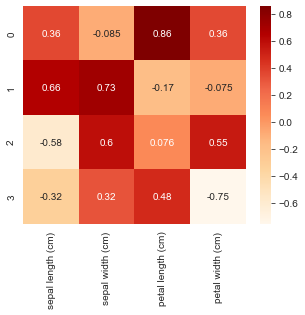

In [9]:
sb.heatmap(comps, cmap="OrRd", annot=True)

### Interpretation and Application
- we can see how the 1st 2 components are positively and negatively related with the features
- can use those 2 components as input to MML algorithms (such as classification algos) to predict classificatino of new data points

In [10]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
# use the above website for the rest of analysis 
y = iris.target

#### model fitting procedure 1: 
   - <font color = red>PCA fit --> standardize the pca input --> log regre mdl fit --> predict --> scoring </font>
   - ( this is the procedure I created without following anything)

In [11]:
#directly use n=2 when creating the model 
pca2 = decomposition.PCA(n_components=2)
pComponents = pca2.fit_transform(X)
print(pComponents.shape)
pComponentsDf = pd.DataFrame(data = pComponents, columns = ['pc1', 'pc2'])

pComponentsDf

(150, 2)


,pc1,pc2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


In [12]:
#extract the 1st two components from a 4 component model 

comps2 = iris_pca[:,0:2]



In [13]:
prinComposDf = pd.DataFrame(data = comps2, columns = ['pc1', 'pc2'])
prinComposDf

,pc1,pc2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


In [17]:
yDf = pd.DataFrame(data = y, columns = ['target'])
finalDf = pd.concat([prinComposDf, yDf], axis = 1)

In [18]:
finalDf

,pc1,pc2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0
...,...,...,...
145,1.944110,0.187532,2
146,1.527167,-0.375317,2
147,1.764346,0.078859,2
148,1.900942,0.116628,2


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(prinComposDf, y, test_size = 0.2)

In [21]:
from sklearn.preprocessing import StandardScaler
#standardize the input 

In [22]:
scaler =StandardScaler()
scaler.fit(x_train) #fit the scaler only on the testing set 

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
#use logistic regression model to do classification prediction 
from sklearn.linear_model import LogisticRegression

In [25]:
logRegrMdl = LogisticRegression(solver = 'lbfgs')
logRegrMdl.fit(x_train, y_train)

LogisticRegression()

In [26]:

logRegrMdl.score(x_test, y_test)

0.9333333333333333

#### model fitting procedure 2

    standardization --> pca fit --> log reg model fit --> preditc 
    
    and compare the result with standardization after pca fit 
    
    ( this is the procedure from the website)

In [28]:
x_tr2, x_tst2, y_tr2, y_tst2 = train_test_split(X, y, test_size = 0.2)

In [29]:
scaler2 = StandardScaler()
scaler2.fit(x_tr2)
x_tr2 = scaler2.transform(x_tr2)
x_tst2 = scaler2.transform(x_tst2)

In [33]:
pca2.fit(x_tr2) #get the 2 components 
mdl2_comps = pca2.transform(x_tr2)
mdl2_comps_df = pd.DataFrame(data = mdl2_comps, columns = ['pc1', 'pc2'])
mdl2_comps_df



,pc1,pc2
0,-0.163460,2.640100
1,0.253402,0.888578
2,-2.206449,0.506501
3,1.340767,-0.618483
4,2.392245,-0.187420
...,...,...
115,-0.485380,1.555582
116,0.949141,0.609843
117,0.086390,1.577664
118,-2.344419,-1.051789


In [61]:
mdl2_test_comps = pca2.transform(x_tst2)

print(mdl2_test_comps.shape)

(30, 2)


In [31]:
logRegrMdl2 = LogisticRegression(solver = 'lbfgs')
logRegrMdl2.fit(mdl2_comps, y_tr2)

LogisticRegression()

In [36]:
logRegrMdl.score(mdl2_test_comps, y_tst2)

0.8666666666666667

#### Comparison and Visualization 
    seems like my random procedure works better 

In [55]:
print(y_tst2) #3 labels
colors = np.array(['salmon', 'forestgreen', 'gold'])

[0 0 2 1 1 2 2 0 0 1 1 0 0 1 2 0 0 1 2 2 1 1 0 2 0 2 2 1 0 2]


In [56]:
#plot prinComposDf's 2 columns in a scatter lot using y( the target) as label 
x1x = prinComposDf['pc1']
x1y = prinComposDf['pc2']
y1 = yDf['target']

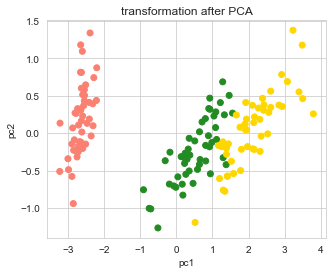

In [57]:
plt.scatter(x = x1x, y = x1y, c = colors[y1])
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.title("transformation after PCA")
plt.show()

In [76]:
x2_tst_dp = pd.DataFrame(mdl2_test_comps)
print(x2_tst_dp.shape)
X2 = pd.concat([mdl2_comps_df ,x2_tst_dp], axis = 0)
print(X2.shape)
print(mdl2_comps_df.shape)

(30, 2)
(150, 4)
(120, 2)


In [67]:
x2x = X2['pc1']
x2y = X2['pc2']

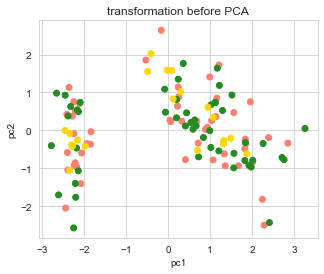

In [69]:
plt.scatter(x = x2x, y = x2y, c = colors[y1])
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.title("transformation before PCA")
plt.show()